In [2]:
library(mlbench); library(ggplot2); library(GGally)

## Starting Project
We start by just getting a general idea of the data and formatting the data as appropriate. For example, the dataset may load some numbers in as string data type when a numeric data type would be more appropriate.

We will put code that pulls the dataset and makes those edits in an R file, called load_data.r, that I will run at the top of each notebook. The following notebooks will not run `wholesale_data <- read.csv('../data/dataset.csv', header = TRUE)` but rather `source('../src/load_data.r')`

In [3]:
wholesale_data = read.csv('../data/dataset.csv', header = TRUE)

## Dataset Description
We will just get some basic descriptors of the data set such as the dimensions, memory size, what the first dozen or so rows look like, data types in the dataset, and the dataset's memory size. We will make sure that the data loaded correctly and matches the description from the UCI Machine Learning Repository.

In [4]:
# dim stands for dimensions
dim(wholesale_data)

[1] 440   8

In [5]:
# size in memory
object.size(wholesale_data)

15512 bytes

In [6]:
# first dozen or so rows
head(wholesale_data)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


In [7]:
#str stands for structure
str(wholesale_data)

'data.frame':	440 obs. of  8 variables:
 $ Channel         : int  2 2 2 1 2 2 2 2 1 2 ...
 $ Region          : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Fresh           : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Milk            : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Grocery         : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Frozen          : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ Detergents_Paper: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicassen      : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


### Summary Statistics

In [8]:
summary(wholesale_data)

    Channel          Region          Fresh             Milk      
 Min.   :1.000   Min.   :1.000   Min.   :     3   Min.   :   55  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128   1st Qu.: 1533  
 Median :1.000   Median :3.000   Median :  8504   Median : 3627  
 Mean   :1.323   Mean   :2.543   Mean   : 12000   Mean   : 5796  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934   3rd Qu.: 7190  
 Max.   :2.000   Max.   :3.000   Max.   :112151   Max.   :73498  
    Grocery          Frozen        Detergents_Paper    Delicassen     
 Min.   :    3   Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 4756   Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :92780   Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

## Data Conditioning

### Fixing Spelling Error
There is a typo in the dataset. "Delicatessen" is spelled incorrectly. We will change column name to "Deli" which is more commonly used than the long form in the U.S. at least.

In [9]:
colnames(wholesale_data)[8] <- 'Deli'
head(wholesale_data)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


### Making Dataset More Readable and Understandable

From the output of `str(wholesale_data)`, we see that all the data is of type integer which matches the UCI Machine Learning repository's description of the dataset. I will change those integers to the actual names of channels and regions.

We can what region 1, 2, and 3 correspond by matching the frequency of each region with the frequency given in the dataset description. In the dataset, the regions are called region 1, 2, and 3. 
From the dataset description:  
REGION	Frequency  
Lisbon	77  
Oporto	47  
Other Region 316   
Total	440

We used the same method to determine what channels 1 and 2 were.   
CHANNEL	Frequency  
Horeca	298  
Retail 142  
Total 440 

In [10]:
# This will give me the frequency of 1 and 2 in Channel column
cat("Channel"); table(wholesale_data$Channel)
# This will give me the frequency of 1, 2, and 3 in Region column
cat("Region"); table(wholesale_data$Region)

Channel


  1   2 
298 142 

Region


  1   2   3 
 77  47 316 

We can infer the following.  
Region 1 is Lisbon  
Region 2 is Oporto  
Region 3 is "Other Region". 


Channel 1 is Horeca (which stands for hotel/restaurant/cafe).  
Channel 2 is retail. 

In [11]:
wholesale_data$Channel[wholesale_data$Channel == 1] <- "Horeca"
wholesale_data$Channel[wholesale_data$Channel == 2] <- "Retail"

wholesale_data$Region[wholesale_data$Region == 1] <- "Lisbon"
wholesale_data$Region[wholesale_data$Region == 2] <- "Oporto"
wholesale_data$Region[wholesale_data$Region == 3] <- "Other"

By changing the datatypes of the Channel and Region columns from integers to factors (categorical values in R), we are also telling R that those two features are not numerical factors. This affects calculations. We see this in how the summary statistics have changed.

In [12]:
summary(wholesale_data)

   Channel             Region              Fresh             Milk      
 Length:440         Length:440         Min.   :     3   Min.   :   55  
 Class :character   Class :character   1st Qu.:  3128   1st Qu.: 1533  
 Mode  :character   Mode  :character   Median :  8504   Median : 3627  
                                       Mean   : 12000   Mean   : 5796  
                                       3rd Qu.: 16934   3rd Qu.: 7190  
                                       Max.   :112151   Max.   :73498  
    Grocery          Frozen        Detergents_Paper       Deli        
 Min.   :    3   Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 4756   Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :92780   Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

### Checking for NA and Null Values

In [13]:
## checkg for NA
# in R: TRUE + TRUE = 2
print(sum(is.na(wholesale_data)))
print(sum(is.null(wholesale_data)))

[1] 0
[1] 0


### Hunting for Outliers using Tukey's Method

#### Tukey's Method
Using Tukey's Method, outliers are defined as values < $Q_{1} - 1.5IQR$ and values > $Q_{3} + 1.5IQR$ where IQR is the *interquartile range*.  
$IQR = Q_{3} - Q{1}$  
where $Q_{1}$ is the value in the dataset >= 25% of the values and <=75% of the values in the datset, $Q_{2}$ is the value >= 50% of the values and <= the rest of the values, and so forth. 


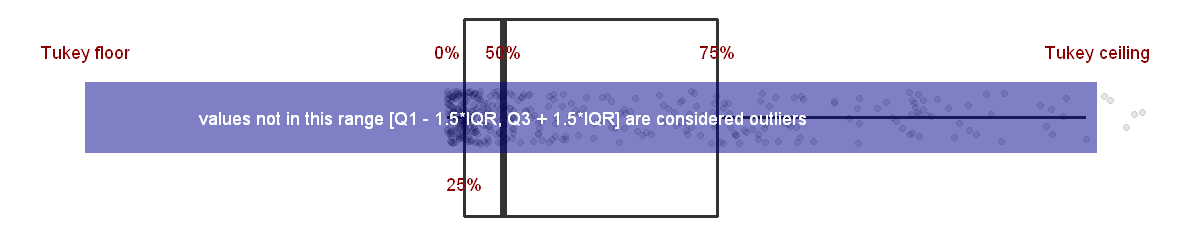

In [329]:
options(repr.plot.width = 10, repr.plot.height = 2)

q <- quantile(wholesale_data$Detergents_Paper)
iqr <- q['75%'] - q['25%']
q[['Tukey floor']] <- q['25%'] - 1.5*iqr
q[['Tukey ceiling']] <- q['75%'] + 1.5* iqr

horiz_boxplot <- ggplot(wholesale_data, aes(x = 0, y = Detergents_Paper)) + 
                    geom_boxplot(outlier.alpha = 0, size = 1) + 
                    coord_flip(ylim = c(-5500, 10000)) 

points <- geom_jitter(width = 0.1, alpha = 0.1)

labels <- annotate(geom = 'text', y = q, x = c(0.25, -0.25, 0.25, 0.25, -0.25, 0.25, 0.25),  
                  label = names(q), check_overlap = FALSE, color = 'darkred')

tukey_window <- annotate(geom = 'line', y = c(q['Tukey floor'], q['Tukey ceiling']), 
                         x = 0, size = 20, color = 'darkblue', alpha = 0.5) 
text_in_window <- annotate(geom = 'text', x = 0, y = q['50%'],
                           color = 'white',
                           label = 'values not in this range [Q1 - 1.5*IQR, Q3 + 1.5*IQR] are considered outliers')

blank_background <- theme(panel.background = element_blank(),
                          axis.line = element_blank(),
                          axis.ticks = element_blank(),
                          axis.text = element_blank(),
                          axis.title.x = element_blank(),
                          axis.title.y = element_blank()) 

tukey_graphic <- horiz_boxplot + points + labels + tukey_window + text_in_window + blank_background
print(tukey_graphic)

### Changing Size of 'Tukey Window'
Let's call the range of values not considered outliers under Tukey's method, Tukey's windows for simplicity. It's not a technical term. We will widen Tukey's window by changing the factor from 1.5 to 4 because this dataset contains many outliers. There is a large spread so it would be more useful to consider the values on the more extreme ends. 

In [330]:
# TODO: ADD display_outliers() to handy_fns or source
display_outliers <- function(feature, param = 4, df = wholesale_data) {
    feature_vec =  as.vector(wholesale_data[[feature]])
    Q1 <- quantile(feature_vec, .25)
    Q3 <- quantile(feature_vec, .75)
    tukey_window <- param*(Q3-Q1)

    # less_than_Q1 & greater_than_Q3 are masks, meaning they're vectors whose
    # elements are booleans
    less_than_Q1 <- wholesale_data[[feature]] < Q1 - tukey_window
    greater_than_Q3 <- wholesale_data[[feature]] > Q3 + tukey_window
    tukey_mask <- (less_than_Q1 | greater_than_Q3)
    outliers <- wholesale_data[tukey_mask,]
    return(outliers)
}


In [341]:
num_df <- Filter(is.numeric, wholesale_data)
outlier_dfs <- sapply(X = colnames(num_df), FUN = display_outliers, simplify = FALSE)

In [342]:
outlier_dfs

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli,outlier_for
126,Horeca,Other,76237,3473,7102,16538,778,918,many_feats
182,Horeca,Other,112151,29627,18148,16745,4948,8550,many_feats
,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli,outlier_for
24,Retail,Other,26373,36423,22019,5154,4337,16523,many_feats
48,Retail,Other,44466,54259,55571,7782,24171,6465,many_feats
57,Retail,Other,4098,29892,26866,2616,17740,1340,one_feat
62,Retail,Other,35942,38369,59598,3254,26701,2017,many_feats
86,Retail,Other,16117,46197,92780,1026,40827,2944,many_feats
87,Retail,Other,22925,73498,32114,987,20070,903,many_feats
184,Horeca,Other,36847,43950,20170,36534,239,47943,many_feats


It is nice to be able to see the data frames filtered for outliers, but it's very granular. Let's get a count of the number of outliers for each feature. 

In [343]:
count_outliers <- function(feature) {
    outlier_count <- dim(display_outliers(feature))[1]
    return(outlier_count)
}

sapply(colnames(Filter(is.numeric, wholesale_data)), count_outliers)


Fresh             Milk          Grocery           Frozen 
               2                7                5               12 
Detergents_Paper             Deli 
               9                6

In [345]:
names(outlier_dfs)

[1] "Fresh"            "Milk"             "Grocery"          "Frozen"          
[5] "Detergents_Paper" "Deli"

In [385]:
## sapply() is difficult because rownames() returns a vector and sapply does not append vectors to return a vector
## it will return a list which messes up following code

raw_outliers <- c()
for (feat in outlier_dfs) {
    ndx <- c(row.names(feat))
    raw_outliers <- c(raw_outliers, ndx)
}

freq_outliers <- as.data.frame(table(raw_outliers))

In [375]:
freq_outliers[freq_outliers$Freq > 1,]

,raw_outliers,Freq
2,126,2
3,182,3
4,184,3
7,24,2
12,334,2
17,48,3
19,62,3
20,66,2
22,86,3
23,87,2


In [21]:
wholesale_data['outlier_for'] <- rownames(wholesale_data) %in% raw_outliers

In [22]:
outliers_many_feats <- freq_outliers[freq_outliers$Freq > 1,]$raw_outliers

In [23]:
many_feats <- rownames(wholesale_data) %in% outliers_many_feats
wholesale_data$outlier_for[many_feats] <- 'many_feats'

In [24]:
wholesale_data$outlier_for[wholesale_data$outlier_for == TRUE] <- 'one_feat'
wholesale_data$outlier_for[wholesale_data$outlier_for == FALSE] <- 'zero'

In [25]:
head(wholesale_data)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli,outlier_for
Retail,Other,12669,9656,7561,214,2674,1338,zero
Retail,Other,7057,9810,9568,1762,3293,1776,zero
Retail,Other,6353,8808,7684,2405,3516,7844,one_feat
Horeca,Other,13265,1196,4221,6404,507,1788,zero
Retail,Other,22615,5410,7198,3915,1777,5185,zero
Retail,Other,9413,8259,5126,666,1795,1451,zero


From R Documentation:

    ggpairs(data, mapping = NULL, columns = 1:ncol(data), title = NULL,
      upper = list(continuous = "cor", combo = "box_no_facet", discrete =
      "facetbar", na = "na"), lower = list(continuous = "points", combo =
      "facethist", discrete = "facetbar", na = "na"), diag = list(continuous =
      "densityDiag", discrete = "barDiag", na = "naDiag"), params = NULL, ...,
      xlab = NULL, ylab = NULL, axisLabels = c("show", "internal", "none"),
      columnLabels = colnames(data[columns]), labeller = "label_value",
      switch = NULL, showStrips = NULL, legend = NULL,
      cardinality_threshold = 15, legends = stop("deprecated"))


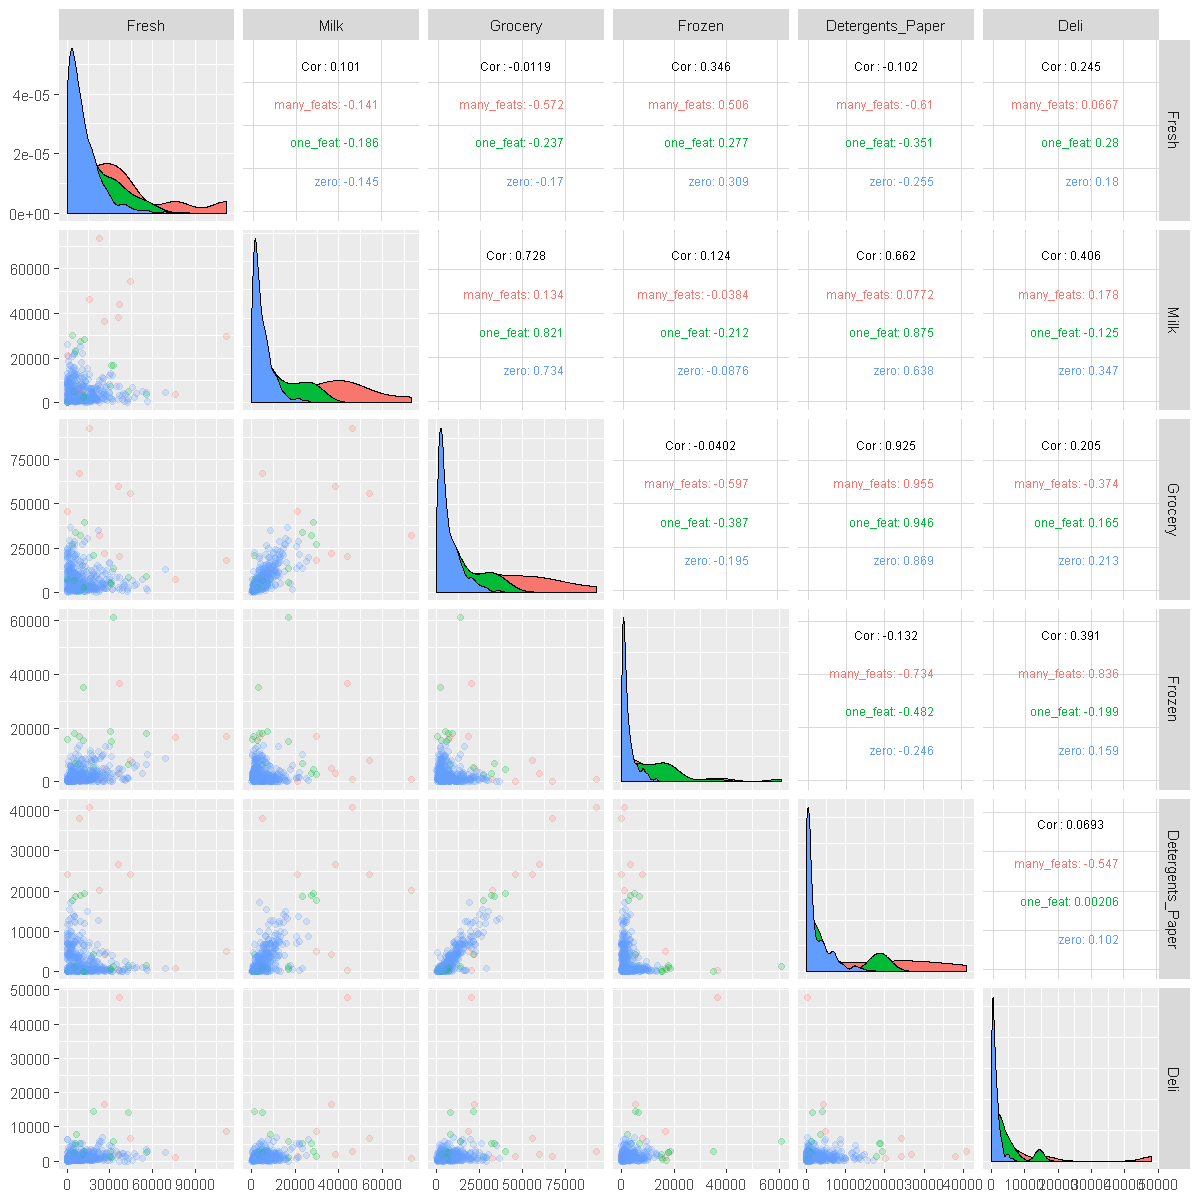

In [26]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggpairs(data = wholesale_data, 
        columns = c('Fresh','Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Deli'), 
        mapping = aes(color = outlier_for),
        upper = list(continuous = wrap(ggally_cor, size = 2.5, alignPercent = 0.8)),
        lower = list(continuous = wrap(ggally_points, alpha = 0.2)),
       )
       

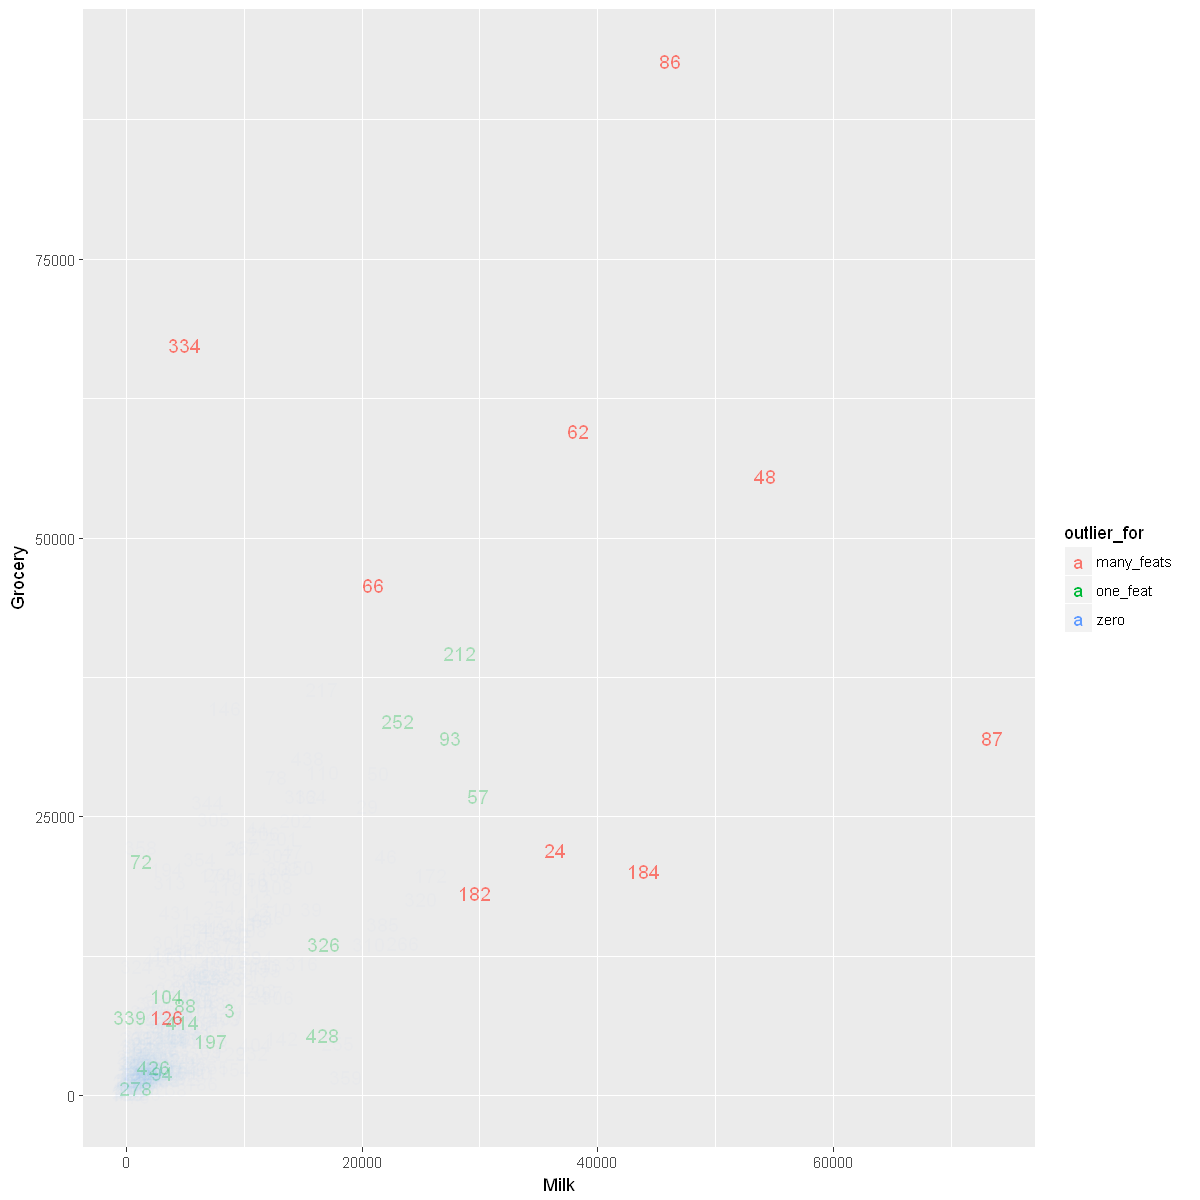

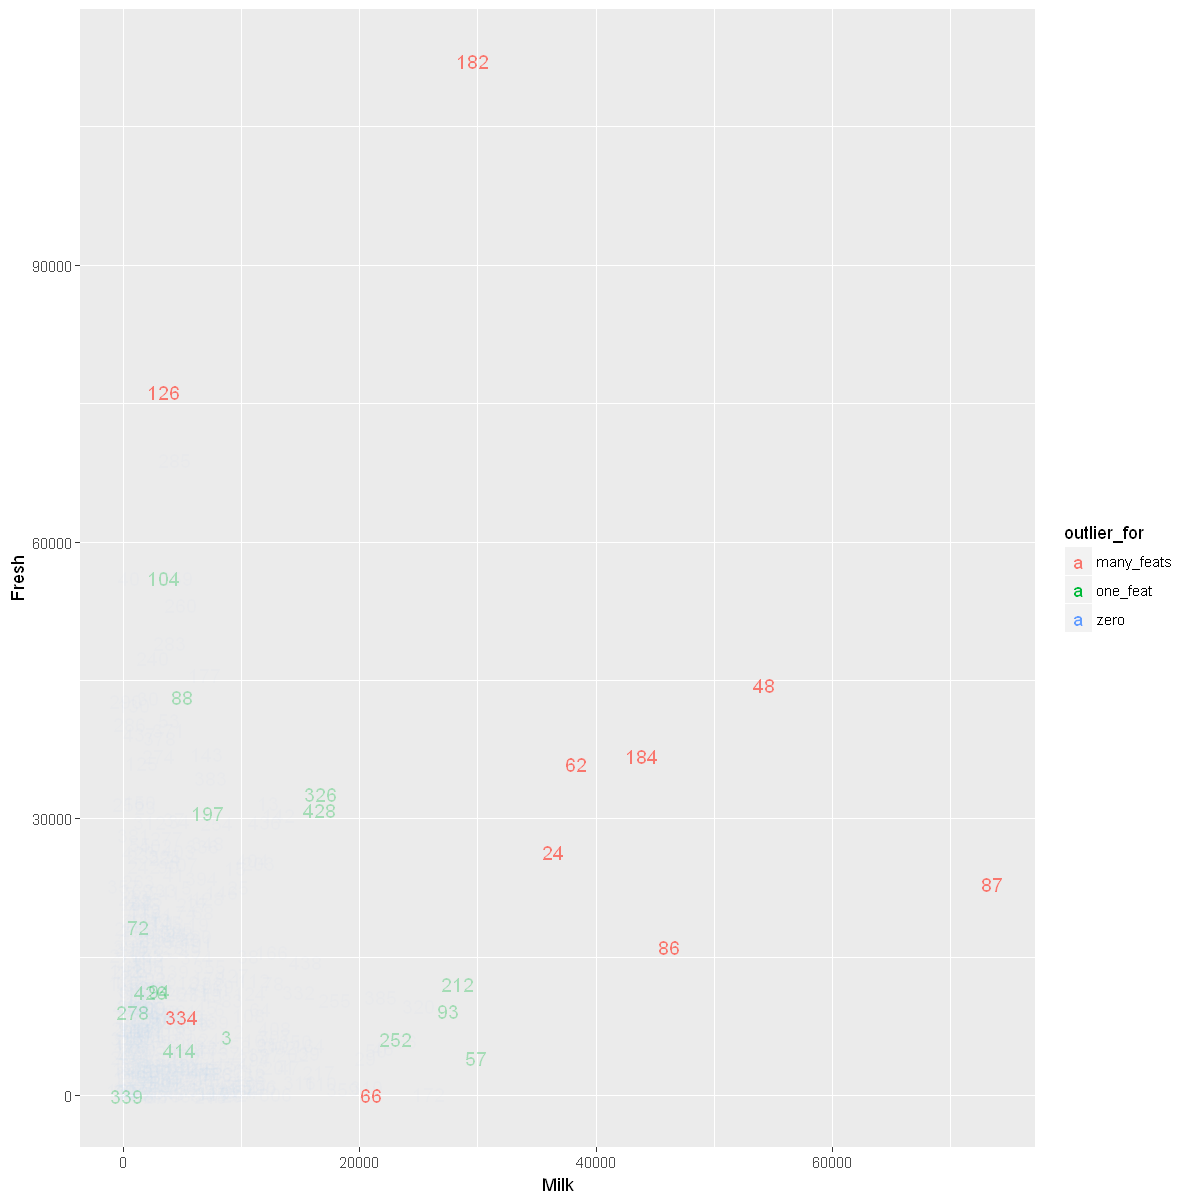

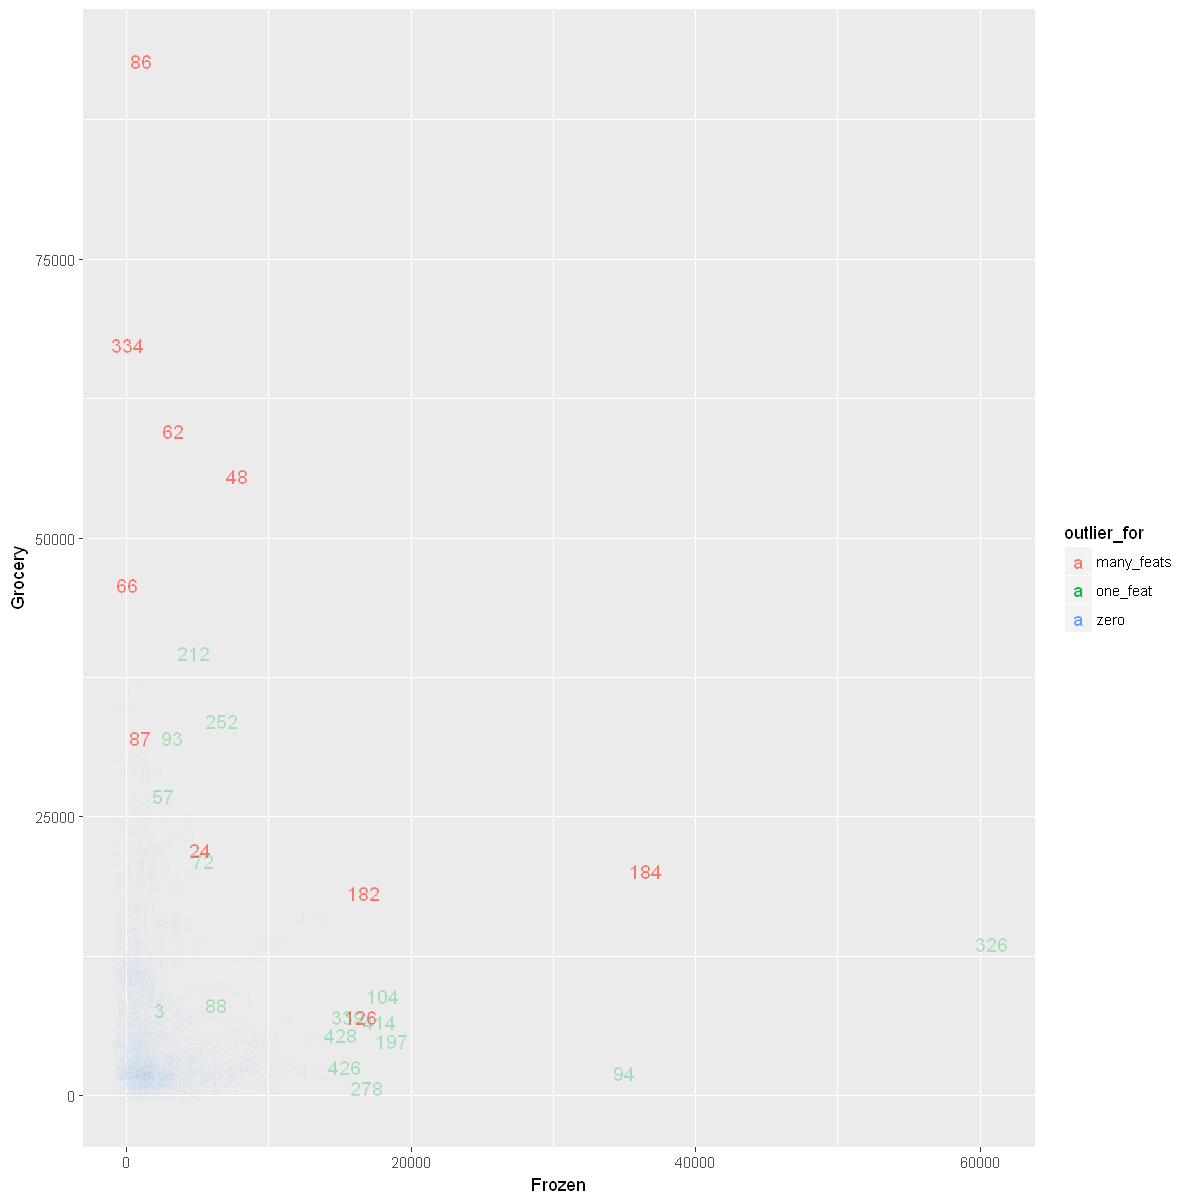

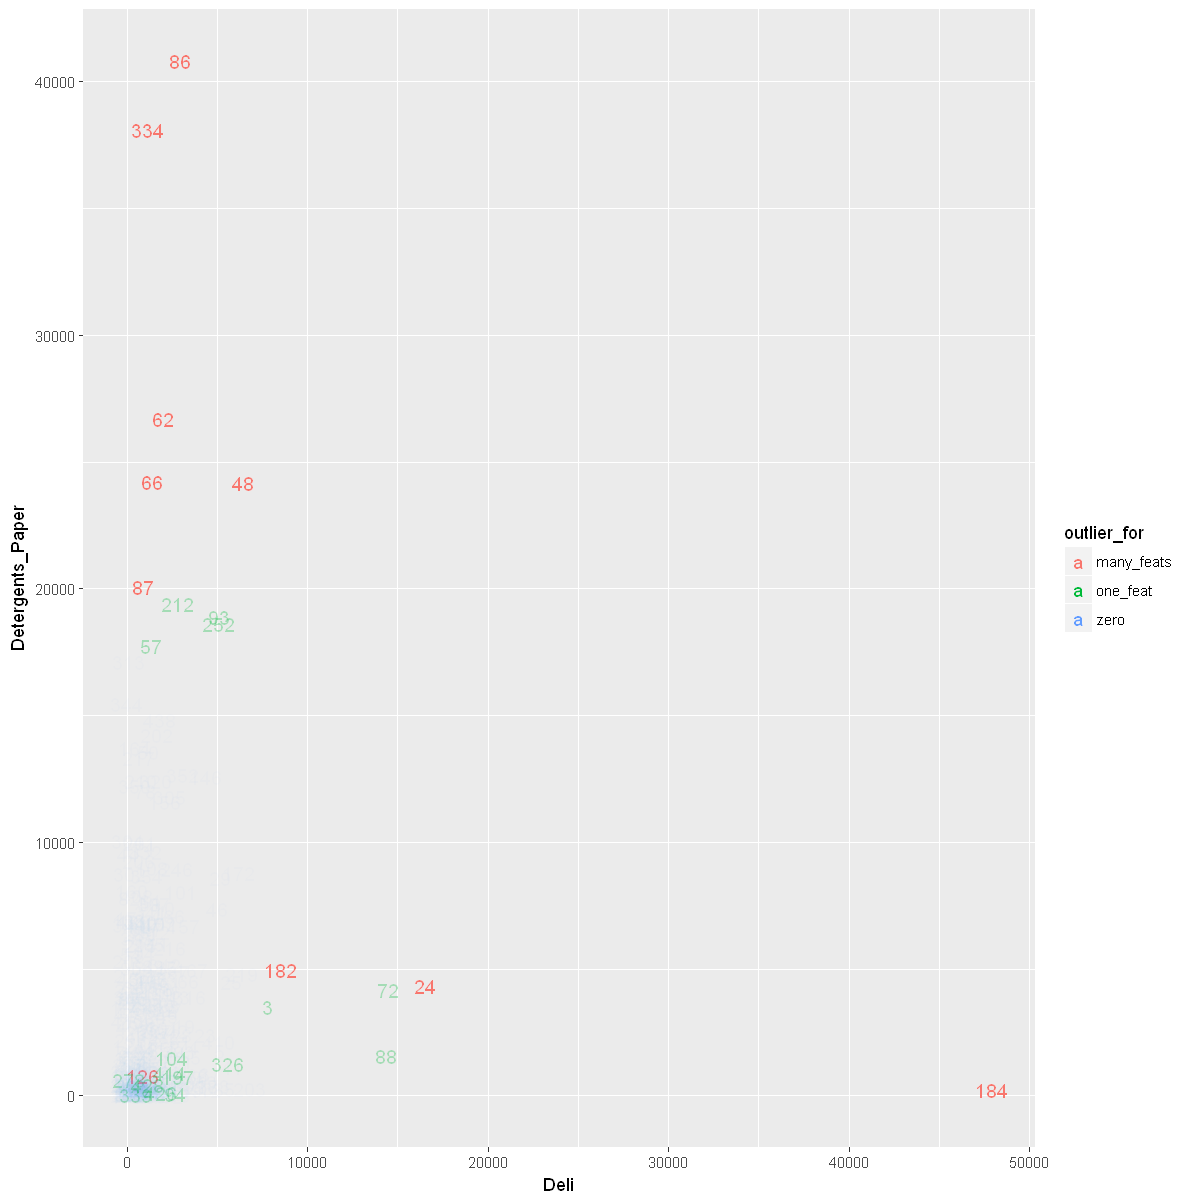

In [27]:
show_outliers_in_scatter <- function(xFeat, yFeat) {
    ggplot(wholesale_data, aes_string(x = substitute(xFeat), y = substitute(yFeat), color = 'outlier_for',
                                alpha = 'outlier_for')) +
    geom_text(check_overlap = FALSE, size = 4, aes(label = rownames(wholesale_data))) +
    scale_alpha_manual(guide = 'none', values = list(zero = 0.02, one_feat = 0.3, many_feats = 1))
}

show_outliers_in_scatter(Milk, Grocery)
show_outliers_in_scatter(Milk, Fresh)
show_outliers_in_scatter(Frozen, Grocery)
show_outliers_in_scatter(Deli, Detergents_Paper)

#### Verdict: Will Not Remove Outliers
Usually, we would remove some outliers but (1) there appears that outliers for many features are also the most extreme outliers within each feature and (2) there is no target variable so outliers are less of a concern. If there were outliers for many features closer to denser areas. 